In [1]:
from arpes.all import *
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np

C:\Users\fb7365\Documents\CODES\arpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2023-10-16_17-03-45.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [2]:
# Define directory
# path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")
path = os.path.abspath("E:/DATA/EPFL/ARPES/e19775/Box_1_square_renamed")
# Different parameters used to set up scans at SLS
scan_type = '*'
direction = 'X'
phi = '*'
energy = '25eV'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = '*'
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

au_full_file = os.path.join(path, file)
file

'*_X_*_25eV_*_*_*eVpass_*_000*.h5'

In [3]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
au_files = glob.glob(au_full_file)
print(len(au_files))
au_files

9


['E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_CIRCP_HT_5eVpass_GoldRef127K_0000.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0000.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0001.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0002.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0003.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0004.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0005.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0006.h5',
 'E:\\DATA\\EPFL\\ARPES\\e19775\\Box_1_square_renamed\\EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0007.h5']

In [4]:
au_raw_data_list = {}
for file in au_files:
    #data_list.append(load_data(file, location="ULTRA"))
    data = load_data(file, location="ULTRA")
    # k_data = convert_to_kspace(data.spectrum)
    file_name = file.replace(path, '')[1:-3]
    au_raw_data_list.update({file_name : data})

poly Au used to determine Fermi level. Determine Fermiedge and apply to data below

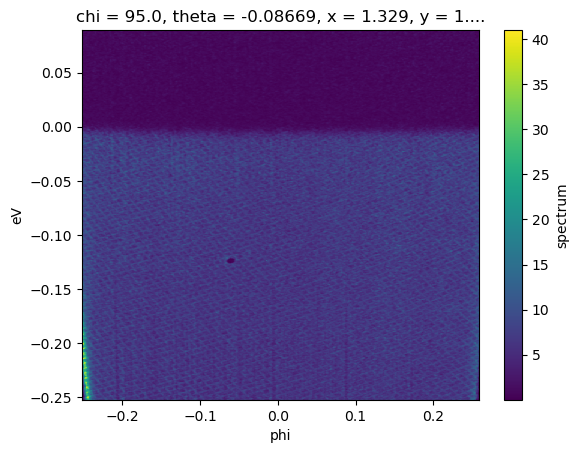

In [5]:
au_lt = au_raw_data_list['EDC_X_P95_25eV_UNKN_LT_5eVpass_GoldRef11K_0007']
au_lt.S.plot()

In [6]:
from arpes.analysis.general import rebin

binned = rebin(au_lt, phi=10).spectrum
binned.plot()

In [7]:
from arpes.all import AffineBroadenedFD, broadcast_model
fermi_level = binned.sel(phi=slice(-0.2,0.2), eV=slice(-0.2,0.1))
results = broadcast_model(AffineBroadenedFD, fermi_level, "phi")

fig, ax = plt.subplots()
fermi_level.plot(ax=ax)
ax.scatter(*results.F.p("fd_center").G.to_arrays(), color="red")
ax.axhline(y=0, color='k', linestyle='--', linewidth=1)

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/52 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


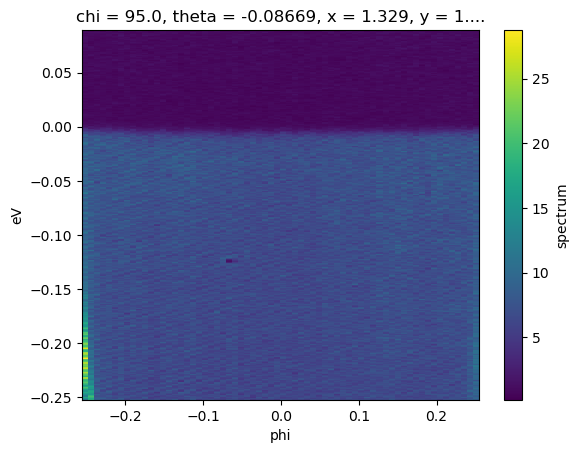

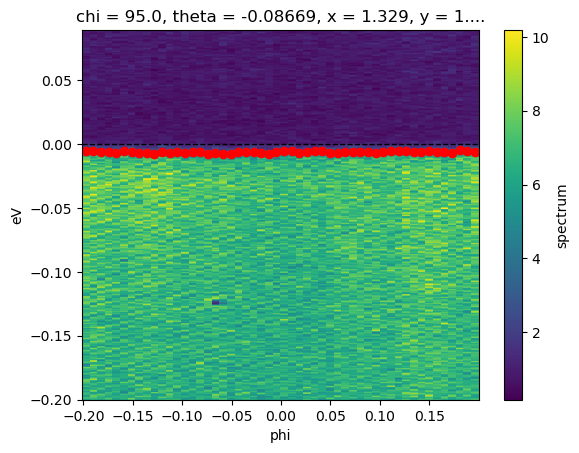

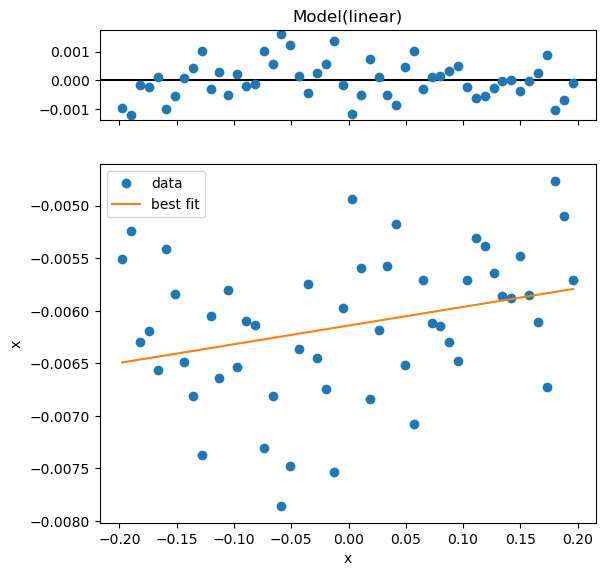

In [8]:
from arpes.fits.fit_models import LinearModel
lin_mod = LinearModel().guess_fit(results.F.p("fd_center"))
lin_mod.plot()
plt.show()
results.F.show()

In [ ]:
# Define directory
path = os.path.abspath("G:\My Drive\Bi2223\e19557\Box_1_square_renamed")

# Different parameters used to set up scans at SLS
scan_type = 'FS'
direction = 'AN'
phi = '*'
energy = '*'
polarization = '*'
temp = '*'
e_pass = '*'+'eVpass'
comment = ''
run = '*'.zfill(4)

# Put together string for finding file
parameters = [scan_type, direction, phi, energy, polarization, temp, e_pass, comment, run]
if comment == '':
    parameters.remove(comment)
file_type = 'h5'
file_name = '_'.join(parameters)
file = '.'.join([file_name , file_type])

bi2223_full_file = os.path.join(path, file)
file

In [ ]:
import glob
# Load all files with above specified parameters, * is a placeholder and imports all files in its place
bi2223_files = glob.glob(bi2223_full_file)
print(len(bi2223_files))
bi2223_files

In [ ]:
bi2223_data_list = {}
for file in bi2223_files:
    #data_list.append(load_data(file, location="ULTRA"))
    raw_data = load_data(file, location="ULTRA")
    edge = lin_mod.eval(x=raw_data.spectrum.phi)
    corrected_data = raw_data.spectrum.G.shift_by(edge, "eV")
    k_data = convert_to_kspace(corrected_data)
    file_name = file.replace(path, '')[1:-3]
    bi2223_data_list.update({file_name : k_data})

Initalize datasets

In [ ]:
lt_an_p5 = bi2223_data_list['FS_AN_P5_25eV_CIRCP_LT_5eVpass_0000']
lt_an_p95 = bi2223_data_list['FS_AN_P95_25eV_CIRCP_LT_5eVpass_0000']
ht_an_p5 = bi2223_data_list['FS_AN_P5_25eV_CIRCP_HT_10eVpass_0000']
ht_an_p95 = bi2223_data_list['FS_AN_P95_25eV_CIRCP_HT_10eVpass_0000']

In [ ]:
fig, ax = plt.subplots()

lt_an_p5.S.fermi_surface.plot()
rect_b = patches.Rectangle((-0.4, -0.58), 0.8, 0.18, linewidth=2, edgecolor='r', facecolor='none')
rect_t = patches.Rectangle((-0.4, 0.4), 0.8, 0.18, linewidth=2, edgecolor='w', facecolor='none')
rect_l = patches.Rectangle((-0.58, -0.4), 0.18, 0.8, linewidth=2, edgecolor='k', facecolor='none')
rect_r = patches.Rectangle((0.4, -0.4), 0.22, 0.8, linewidth=2, edgecolor='orange', facecolor='none')
ax.add_patch(rect_b)
ax.add_patch(rect_t)
ax.add_patch(rect_l)
ax.add_patch(rect_r)
plt.show()

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
kx_list = np.arange(-0.58, -0.4, 0.02)
for i, kx_value in enumerate(kx_list):
    lt_an_p5.sel(kx=slice(kx_value, kx_value+0.02), ky=slice(-0.4,0.4), eV=slice(-0.125, 0.025)).sum("kx").plot(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(f"kx = {np.round(kx_value, 2)} to {np.round(kx_value+0.02, 2)}")

plt.suptitle('Red boxed area')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
kx_list = np.arange(0.4, 0.58, 0.02)
for i, kx_value in enumerate(kx_list):
    lt_an_p5.sel(kx=slice(kx_value, kx_value+0.02), ky=slice(-0.4,0.4), eV=slice(-0.125, 0.025)).sum("kx").plot(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(f"kx ={np.round(kx_value, 2)} to {np.round(kx_value+0.02, 2)}")

plt.suptitle('White boxed area')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
kx_list = np.arange(-0.58, -0.4, 0.02)
for i, kx_value in enumerate(kx_list):
    lt_an_p5.sel(ky=slice(kx_value, kx_value+0.02), kx=slice(-0.4,0.4), eV=slice(-0.125, 0.025)).sum("ky").plot(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(f"ky = {np.round(kx_value, 2)} to {np.round(kx_value+0.02, 2)}")

plt.suptitle('Black boxed area')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(14, 12))
kx_list = np.arange(0.4, 0.62, 0.02)
for i, kx_value in enumerate(kx_list):
    lt_an_p5.sel(ky=slice(kx_value, kx_value+0.02), kx=slice(-0.4,0.4), eV=slice(-0.125, 0.025)).sum("ky").plot(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(f"ky = {np.round(kx_value, 2)} to {np.round(kx_value+0.02, 2)}")

plt.suptitle('Orange boxed area')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])